<a href="https://colab.research.google.com/github/ruman-shaikh/NLP_Project_Grp_1/blob/master/LogisticRegressionInference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/Shareddrives/NMA_DL_Dolma_1/Models/
%pwd
%ls

Mounted at /gdrive
/gdrive/Shareddrives/NMA_DL_Dolma_1/Models
ClassifierNet.pth  LogicticRegression.p


In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pickle

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

In [ ]:
filename = "LogicticRegression.p"

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
%cd /gdrive/Shareddrives/NMA_DL_Dolma_1/Datasets/Sentiment140/EMB
%pwd
%ls

/gdrive/Shareddrives/NMA_DL_Dolma_1/Datasets/Sentiment140/EMB
data/  test_embeddings.pkl  train_embeddings.pkl  val_embeddings.pkl


In [ ]:
def load_emb(filename):
  with open(filename, "rb") as fIn:
    stored_data = pickle.load(fIn)
    stored_sentences = stored_data['sentences']
    stored_embeddings = stored_data['embeddings']
    stored_labels = stored_data['labels']
  
  return stored_sentences, stored_embeddings, stored_labels

In [ ]:
train_sentences, train_embs, train_labels = load_emb("train_embeddings.pkl")
train_labels = np.array(train_labels) / 4
print(len(train_sentences), train_embs.shape, len(train_labels))

960000 (960000, 384) 960000


In [ ]:
test_sentences, test_embs, test_labels = load_emb("test_embeddings.pkl")
test_labels = np.array(test_labels) / 4
print(len(test_sentences), test_embs.shape, len(test_labels))

320000 (320000, 384) 320000


In [ ]:
val_sentences, val_embs, val_labels = load_emb("val_embeddings.pkl")
val_labels = np.array(val_labels) / 4
print(len(val_sentences), val_embs.shape, len(val_labels))

320000 (320000, 384) 320000


In [ ]:
result = loaded_model.score(test_embs, test_labels)
print(result)

0.772284375


In [ ]:
#define metrics
y_pred_proba = loaded_model.predict_proba(test_embs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)

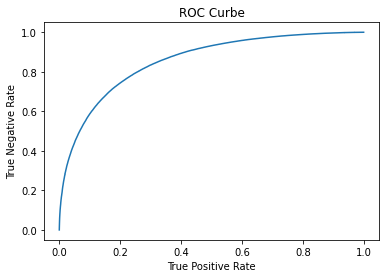

In [ ]:
plt.plot(fpr, tpr)
plt.title("ROC Curbe")
plt.xlabel("True Positive Rate")
plt.ylabel("True Negative Rate")
plt.show()

In [ ]:
test_prediction = loaded_model.predict(test_embs)
test_prediction, test_prediction.shape

(array([1., 0., 1., ..., 0., 0., 0.]), (320000,))

In [ ]:
neg_adv_sent = []
neg_adv_emb = []
pos_adv_sent = []
pos_adv_emb = []

assert test_labels.shape[0] == test_prediction.shape[0] == len(test_sentences) == test_embs.shape[0]

for i in range(test_labels.shape[0]):
  if (test_labels[i] == 0 and test_prediction[i] == 1):
    pos_adv_sent.append(test_sentences[i])
    pos_adv_emb.append(test_embs[i])
  if (test_labels[i] == 1 and test_prediction[i] == 0):
    neg_adv_sent.append(test_sentences[i])
    neg_adv_emb.append(test_embs[i])

In [ ]:
assert len(neg_adv_sent) == len(neg_adv_emb)
assert len(pos_adv_sent) == len(pos_adv_emb)
assert (1 - ((len(neg_adv_sent) + len(pos_adv_sent)) / len(test_sentences))) == result

In [ ]:
neg_df = pd.DataFrame(neg_adv_sent, columns=["Sentences"])
pos_df = pd.DataFrame(pos_adv_sent, columns=["Sentences"])

In [ ]:
neg_df.head()

,Sentences
0,start packing
1,el link se ha caido! fix it pleaseeeeeeee!!!
2,"only week, and i'm off to rhodes, greece it h..."
3,had a good night but i think adam got me sick...
4,something in my tv show pissed me off


In [ ]:
pos_df.head()

,Sentences
0,is already sleepy! had a good time at montana'...
1,if i hadn't spent so much money over the last ...
2,"believe what you want, i know you're good ;) ..."
3,now that's just mean! i really wanna know wha...
4,ready to sleep and i took a nap today! i'm old!


In [ ]:
adv_path = "/content/drive/Shareddrives/NMA_DL_Dolma_1/Datasets/Sentiment140/AdversarialExamples"

%cd {adv_path}
%pwd

/content/drive/Shareddrives/NMA_DL_Dolma_1/Datasets/Sentiment140/AdversarialExamples


'/content/drive/Shareddrives/NMA_DL_Dolma_1/Datasets/Sentiment140/AdversarialExamples'

In [ ]:
neg_df.to_csv('AdversarialExamplesNegative.csv')
pos_df.to_csv('AdversarialExamplesPosotive.csv')

In [ ]:
%ls

AdversarialExamplesNegative.csv  AdversarialExamplesPosotive.csv
